In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
from sklearn.metrics import classification_report, confusion_matrix
from keras.preprocessing.image import load_img
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model
import numpy as np

BS = 32
image_size = 0
width = 256
height = 256

classifier1 = load_model('/content/drive/MyDrive/PDDCNN_PLD_With_Data_Augmentation/PDDCNN_PLD_with_Augmentation.h5')

validation_datagen = ImageDataGenerator(rescale = 1./255)
# Create a generator for prediction
validation_generator = validation_datagen.flow_from_directory('/content/drive/MyDrive/PlantVillage/Validation',
                                                                target_size = (height, width),
                                                                batch_size = BS,
                                                                class_mode = 'categorical',
                                                                shuffle=False)

#Confution Matrix and Classification Report
Y_pred = classifier1.predict(validation_generator, verbose = True)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = ['Early_Blight', 'Healthy', 'Late_Blight']
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

Found 214 images belonging to 3 classes.
7/7 [==============================] - 1s 97ms/step
Confusion Matrix
[[83  0 17]
 [ 1 13  0]
 [24  4 72]]
Classification Report
              precision    recall  f1-score   support

Early_Blight       0.77      0.83      0.80       100
     Healthy       0.76      0.93      0.84        14
 Late_Blight       0.81      0.72      0.76       100

    accuracy                           0.79       214
   macro avg       0.78      0.83      0.80       214
weighted avg       0.79      0.79      0.78       214



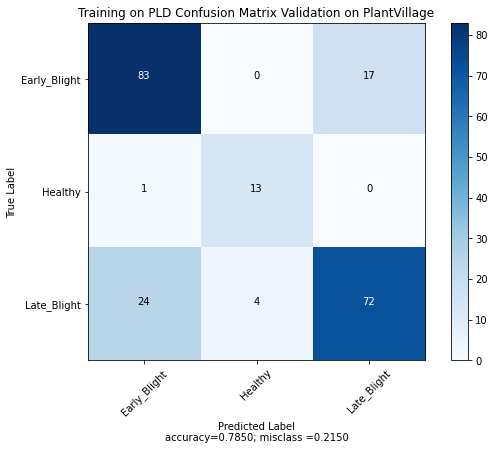

In [10]:
def plot_confusion_matrix(cm,target_names, title='Confusion Matrix', cmap = None, normalize = True):
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools
    
    accuracy = np.trace(cm)/float(np.sum(cm))
    misclass = 1 - accuracy
    
    if cmap is None:
        cmap = plt.get_cmap('Blues')
        
    plt.figure(figsize = (8,6))
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation = 45)
        plt.yticks(tick_marks, target_names)
        
    if normalize:
        cm = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
        
    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i,j]), 
                     horizontalalignment = "center", 
                     color = "white" if cm[i,j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i,j]), 
                     horizontalalignment = "center", 
                     color = "white" if cm[i,j] > thresh else "black")
                    
    
    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label\naccuracy={:0.4f}; misclass ={:0.4f}'.format(accuracy,misclass))
    plt.show()
    


cm = confusion_matrix(validation_generator.classes, y_pred)    
plot_confusion_matrix(cm, normalize = False, 
                     target_names = target_names,
                     title = "Training on PLD Confusion Matrix Validation on PlantVillage")

In [16]:
from sklearn.metrics import classification_report, confusion_matrix
from keras.preprocessing.image import load_img
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model
import numpy as np

BS = 32
image_size = 0
width = 256
height = 256

classifier1 = load_model('/content/drive/MyDrive/PDDCNN_PLD_With_Data_Augmentation/PDDCNN_PLD_with_Augmentation.h5')

Test_datagen = ImageDataGenerator(rescale = 1./255)
# Create a generator for prediction
Test_generator = Test_datagen.flow_from_directory('/content/drive/MyDrive/PlantVillage/Testing',
                                                                target_size = (height, width),
                                                                batch_size = BS,
                                                                class_mode = 'categorical',
                                                                shuffle=False)

#Confution Matrix and Classification Report
Y_pred = classifier1.predict(Test_generator, verbose = True)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(Test_generator.classes, y_pred))
print('Classification Report')
target_names = ['Early Blight', 'Healthy', 'Late Blight']
print(classification_report(Test_generator.classes, y_pred, target_names=target_names))

Found 213 images belonging to 3 classes.
7/7 [==============================] - 1s 99ms/step
Confusion Matrix
[[92  0  8]
 [ 0 13  0]
 [20  1 79]]
Classification Report
              precision    recall  f1-score   support

Early Blight       0.82      0.92      0.87       100
     Healthy       0.93      1.00      0.96        13
 Late Blight       0.91      0.79      0.84       100

    accuracy                           0.86       213
   macro avg       0.89      0.90      0.89       213
weighted avg       0.87      0.86      0.86       213



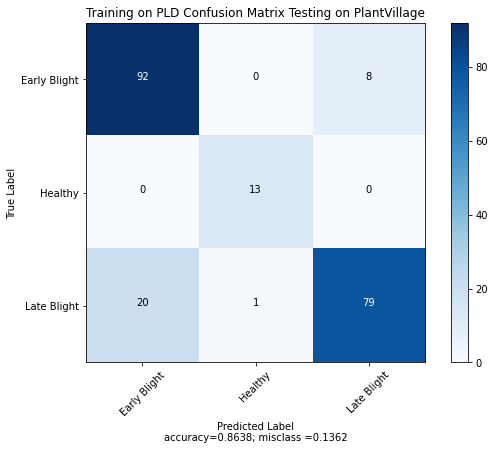

In [17]:
def plot_confusion_matrix(cm,target_names, title='Confusion Matrix', cmap = None, normalize = True):
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools
    
    accuracy = np.trace(cm)/float(np.sum(cm))
    misclass = 1 - accuracy
    
    if cmap is None:
        cmap = plt.get_cmap('Blues')
        
    plt.figure(figsize = (8,6))
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation = 45)
        plt.yticks(tick_marks, target_names)
        
    if normalize:
        cm = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
        
    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i,j]), 
                     horizontalalignment = "center", 
                     color = "white" if cm[i,j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i,j]), 
                     horizontalalignment = "center", 
                     color = "white" if cm[i,j] > thresh else "black")
                    
    
    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label\naccuracy={:0.4f}; misclass ={:0.4f}'.format(accuracy,misclass))
    plt.show()
    


cm = confusion_matrix(Test_generator.classes, y_pred)    
plot_confusion_matrix(cm, normalize = False, 
                     target_names = target_names,
                     title = "Training on PLD Confusion Matrix Testing on PlantVillage")